In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


In [2]:
# Cargar dataset Titanic desde seaborn
df = sns.load_dataset("titanic")

# Nos quedamos con variables numéricas y sexo
df = df[["survived", "age", "fare", "pclass", "sex"]].dropna()

# Convertir sexo a numérico
df["sex"] = df["sex"].map({"male": 0, "female": 1})

X = df[["age", "fare", "pclass", "sex"]]
y = df["survived"]

df.head()


,survived,age,fare,pclass,sex
0,0,22.0,7.2500,3,0
1,1,38.0,71.2833,1,1
2,1,26.0,7.9250,3,1
3,1,35.0,53.1000,1,1
4,0,35.0,8.0500,3,0


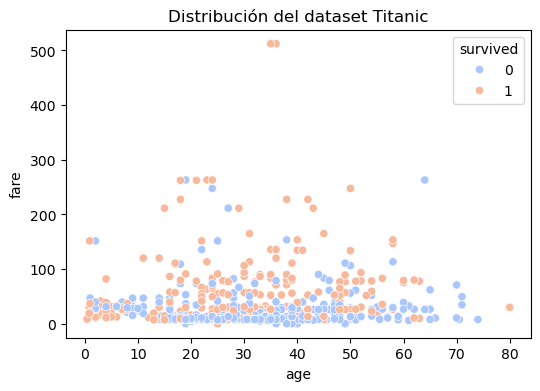

In [3]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="fare", hue="survived", data=df, palette="coolwarm")
plt.title("Distribución del dataset Titanic")
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
model = NuSVC(probability=True, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


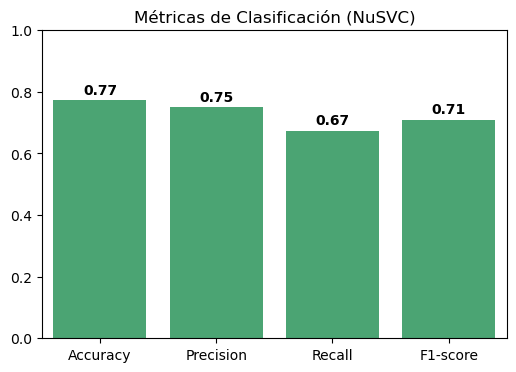

{'Accuracy': 0.772093023255814,
 'Precision': 0.75,
 'Recall': 0.6741573033707865,
 'F1-score': 0.7100591715976331}

In [9]:
# Calcular métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}


plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), color="mediumseagreen")  # color en lugar de palette
plt.title("Métricas de Clasificación (NuSVC)")
plt.ylim(0,1)


for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")

plt.show()


metrics



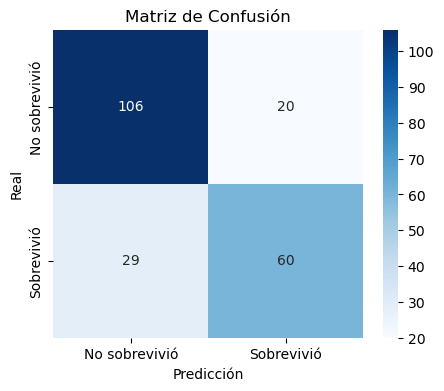

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No sobrevivió", "Sobrevivió"], 
            yticklabels=["No sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


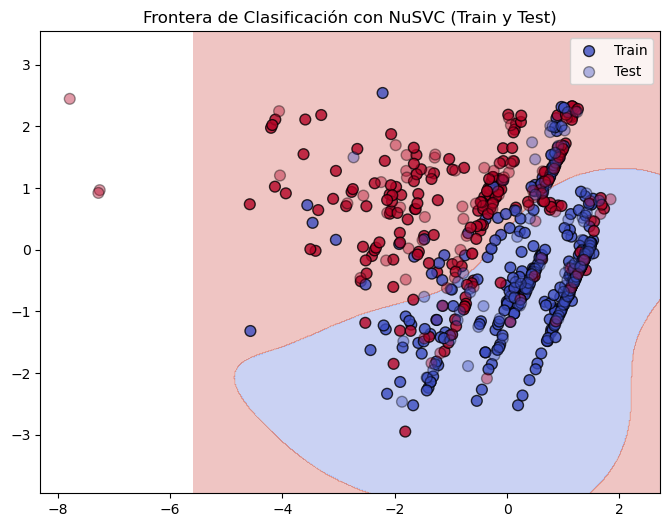

In [13]:
# Reducir dimensiones a 2 componentes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenar NuSVC en 2D
clf2D = NuSVC(probability=True, random_state=42)
clf2D.fit(X_train_pca, y_train)

# Crear malla de puntos para la frontera
x_min, x_max = X_train_pca[:, 0].min()-1, X_train_pca[:, 0].max()+1
y_min, y_max = X_train_pca[:, 1].min()-1, X_train_pca[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = clf2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# Graficar puntos de train
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="coolwarm",
            edgecolor="k", s=60, alpha=0.8, label="Train")

# Graficar puntos de test
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, cmap="coolwarm",
            edgecolor="k", s=60, alpha=0.4, label="Test")

plt.title("Frontera de Clasificación con NuSVC (Train y Test)")
plt.legend()
plt.show()

